In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
late_shipments = pd.read_feather("late_shipments.feather")
print(late_shipments)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

In [3]:
late_shipments.columns.unique()

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [4]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments["late"]=="Yes").mean()

# Print the results
print(late_prop_samp)

0.061


In [5]:
late_shipments_boot_dist = []

for _ in range(500):
    boot_sample = late_shipments.sample(frac=1, replace=True)   # bootstrap sample
    boot_subset = (boot_sample["late"] == "Yes").mean() # subset resampled dataframe to only ["late"]==yes
    late_shipments_boot_dist.append(boot_subset)

print(late_shipments_boot_dist)



[0.06, 0.064, 0.049, 0.064, 0.048, 0.052, 0.063, 0.06, 0.058, 0.068, 0.059, 0.064, 0.062, 0.063, 0.052, 0.062, 0.062, 0.063, 0.058, 0.042, 0.062, 0.062, 0.054, 0.069, 0.062, 0.056, 0.057, 0.061, 0.057, 0.056, 0.068, 0.063, 0.061, 0.078, 0.061, 0.059, 0.068, 0.069, 0.063, 0.057, 0.062, 0.064, 0.05, 0.066, 0.05, 0.057, 0.057, 0.068, 0.067, 0.064, 0.053, 0.064, 0.051, 0.069, 0.067, 0.049, 0.052, 0.058, 0.064, 0.064, 0.054, 0.061, 0.062, 0.075, 0.043, 0.059, 0.059, 0.04, 0.061, 0.066, 0.074, 0.062, 0.059, 0.058, 0.054, 0.059, 0.064, 0.06, 0.063, 0.059, 0.064, 0.057, 0.056, 0.055, 0.071, 0.058, 0.056, 0.053, 0.046, 0.063, 0.054, 0.053, 0.067, 0.066, 0.06, 0.066, 0.06, 0.07, 0.069, 0.054, 0.074, 0.054, 0.07, 0.062, 0.064, 0.056, 0.067, 0.05, 0.053, 0.062, 0.059, 0.047, 0.059, 0.076, 0.052, 0.053, 0.049, 0.061, 0.062, 0.07, 0.073, 0.059, 0.06, 0.055, 0.054, 0.073, 0.066, 0.061, 0.07, 0.064, 0.062, 0.064, 0.063, 0.063, 0.054, 0.048, 0.049, 0.069, 0.041, 0.07, 0.055, 0.061, 0.07, 0.056, 0.078, 

# Calculating a z-score
Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

In [6]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 6/100

# Calculate the standard error
std_error = np.std(late_shipments_boot_dist)

# Find z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Print z_score
print(z_score)

0.1272216197651972


In [7]:
from scipy.stats import norm

In [8]:
# calculate the p-value
p_value = 1-norm.cdf(z_score, loc=0, scale= 1)
                 
# Print the p-value
print(p_value) 

0.449382497158593


In [9]:
alpha =0.05
p_value <= alpha

False

In [10]:
if (p_value <= alpha)== True:
    print('reject null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


# Calculating a confidence interval
If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

In [11]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_dist, 0.025)
upper = np.quantile(late_shipments_boot_dist, 0.975)

# Print the confidence interval
print((lower, upper))

(0.045, 0.07652499999999998)


Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?
Possible answers

Yes, since 0.06 is included in the 95% confidence interval and we failed to reject (Ho) due to a large p-value, the results are similar.

* When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

# TWO SAMPLE MEAN TEST STATISTICS

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

In [12]:
# subsetting for late shipment==yes dataframe and getting the sample mean, stdev and counts for 'weight_kilograms' col
late = late_shipments["late"]=="Yes"
late_df = late_shipments[late]

late_mean = late_df['weight_kilograms'].mean()

late_std = late_df['weight_kilograms'].std()

late_counts = late_df['weight_kilograms'].count()

print(late_mean, late_std, late_counts)

2715.6721311475408 2544.688210903328 61


In [13]:
# subsetting for early shipment==no dataframe and getting the sample mean, stdev and counts for 'weight_kilograms' col
early = late_shipments["late"]=="No"
early_df = late_shipments[early]

early_df['weight_kilograms'].mean()

early_mean = early_df['weight_kilograms'].mean()

early_std = early_df['weight_kilograms'].std()

early_counts = early_df['weight_kilograms'].count()

print(early_mean, early_std, early_counts)

1897.7912673056444 3154.039507084167 939


# t_test formular

t= abs(x_bar sample1 - x_bar sample2) divided by sqrt(std sample1/ count sample1) + sqrt(std sample2/ count sample2)


In [14]:
# Calculate the numerator of the test statistic
numerator = early_mean - late_mean

# Calculate the denominator of the test statistic
denominator = np.sqrt((late_std**2/late_counts) + (early_std**2/early_counts))

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


# CALCULATING P-VALUE FROM T-STATS

# Why is t needed?
The process for calculating p-values is to start with the sample statistic, standardize it to get a test statistic, then transform it via a cumulative distribution function. In Chapter 1, that final transformation was denoted 
, and the CDF transformation used the (standard normal) z-distribution. In the last video, the test statistic was denoted 
, and the transformation used the t-distribution.

A t-distribution is needed instead of the z-distribution When a sample standard deviation is used in estimating a standard error.

using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

# The t-distribution
The t-distribution is used to calculate the p-value from the 
 test statistic, and having a sense of how the PDF and CDF look can help you understand this calculation. It has two parameters: the degrees of freedom, and the non-centrality parameter.

As you increase the degrees of freedom, the t-distribution PDF and CDF curves get closer to those of a normal distribution.

# From t to p
Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

H0: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

Ha: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

t has also been imported from scipy.stats.

Question

What type of test does the alternative hypothesis indicate that we need?

Answer

left_tailed

In [15]:
from scipy.stats import t
# Calculate the degrees of freedom
degrees_of_freedom = (late_counts + early_counts)-2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df= degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


# Anova test

# Visualizing many categories
So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin

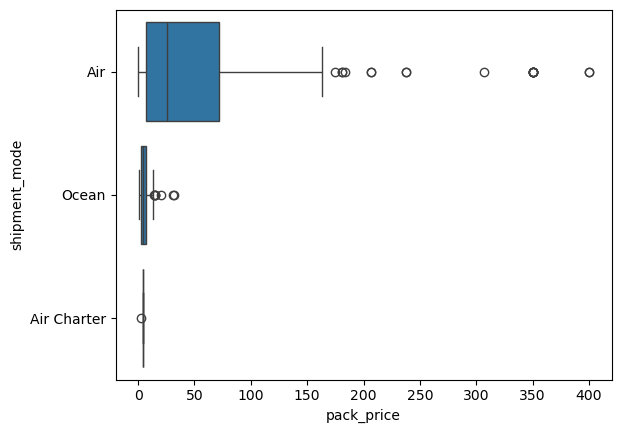

In [17]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price", y="shipment_mode", data= late_shipments)
plt.show()

There certainly looks to be a difference in the pack price between each of the three shipment modes. Do you think the differences are statistically significant?

# Conducting an ANOVA test
The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

H0: Pack prices for every category of shipment mode are the same.

Ha: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

In [18]:
result= pingouin.anova(data=late_shipments, dv= "pack_price", between="shipment_mode")
result

,Source,ddof1,ddof2,F,p-unc,np2
0,shipment_mode,2,997,21.8646,5.089479e-10,0.042018


In [19]:
float_value = float(result.iloc[0, 4])

if float_value <= alpha:
    message = "Reject the null hypothesis."
else:
    message = "Fail to reject the null hypothesis."

print(message + "There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.")


Reject the null hypothesis.There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.


# Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

late_shipments is available and pingouin has been loaded.

In [20]:
# Perform a pairwise t-test on pack price, grouped by shipment mode without doing any p-value adjustment.
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv="pack_price", between="shipment_mode", padjust="None")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [21]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?

Answers

"Ocean" and "Air Charter"; "Ocean" and "Air"; "Air Charter" and "Air". 

After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.

# Proportion test

# t for proportions?
Some of the hypothesis tests in this course have used a 
 test statistic and some have used a 
 test statistic. To get the correct p-value, you need to use the right type of test statistic.

Do tests of proportion(s) use a z or a t test statistic and why?

The test statistic for proportion(s) has only one estimate of a parameter instead of two. The t-test is needed for tests of mean(s) since you are estimating two unknown quantities, which leads to more variability.

# Test for single proportions
In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

z= (sample proportion(p-hat) - hypothesized popoulation proportion(P0))/np.sqrt(P0*(1-P0)/n)

n= sample size


In [22]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score)

# Print the p-value
print(p_value) 

0.44703503936503364


While bootstrapping can be used to estimate the standard error of any statistic, it is computationally intensive. For proportions, using a simple equation of the hypothesized proportion and sample size is easier to compute.

# Two sample proportion test

# Test of two proportions
You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

H0: LATEexp - LATEreasonable = 0

Ha: LATEexp - LATEreasonable > 0

p_hats contains the estimates of population proportions (sample proportions) for each freight_cost_group:

freight_cost_group  late

expensive           Yes     0.082569

reasonable          Yes     0.035165

Name: late, dtype: float64


ns contains the sample sizes for these groups:

freight_cost_group

expensive      545

reasonable     455

Name: late, dtype: int64

p_hat = (n exp * p exp) + (n reasonable * P reasonable)/ n exp + n reasonable

* pooled std error formular for sample statistics for two sample proportion test
* z_score = sample proportion of the two samples ie (p_hat1 - p_hat2)/ SE(p_hat1 - p_hat2)

In [23]:
# Calculate the pooled estimate of the population proportion (Calculate the pooled sample proportion, 
# from p_hats and ns.

p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

NameError: name 'p_hats' is not defined

# Your recent learnings
When you left 18 hours ago, you worked on Proportion Tests, chapter 3 of the course Hypothesis Testing in Python. Here is what you covered in your last lesson:

You learned about conducting two-sample proportion tests, a method to compare the proportions of a binary outcome between two groups. This is crucial when you want to determine if there is a significant difference between two groups in terms of a specific characteristic. For instance, you explored how to test if the proportion of hobbyists differs between two age groups using data from the Stack Overflow survey. Key points covered include:

Formulating null and alternative hypotheses for comparing two proportions. The null hypothesis typically states that there is no difference between the proportions of the two groups.
Calculating the z-score for a two-sample proportion test, which involves finding the difference in sample proportions, the pooled estimate of the population proportion (p-hat), and the standard error of the difference in proportions.
Using Python and pandas to calculate necessary statistics from the data, such as the proportion of hobbyists in each age group and the number of observations in each group. For example, to calculate p-hat, you used the following equation:

p_hat = (p1*n1 + p2*n2) / (n1 + n2)

Employing the proportions_ztest function from the statsmodels.stats.proportion module to perform the test more efficiently, which requires the counts of successes and the number of observations in each group.
Additionally, you applied these concepts to another scenario involving freight costs and shipment lateness, demonstrating the versatility of two-sample proportion tests in various contexts.

The goal of the next lesson is to teach you how to use the chi-square test of independence to determine if there is an association between two categorical variables, using the pingouin package in Python for analysis.

# Performing a chi-square test
The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

EXW: "Ex works". The buyer pays for transportation of the goods.
CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
FCA: "Free carrier". The seller pays for transportation of the goods.
Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

H0: vendor_inco_term and freight_cost_group are independent.

Ha: vendor_inco_term and freight_cost_group are associated.



In [24]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby("vendor_inco_term")["freight_cost_groups"].value_counts(normalize=True)

# Print props
print(props)

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: proportion, dtype: float64


In [25]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
DDU                        NaN    1.000000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


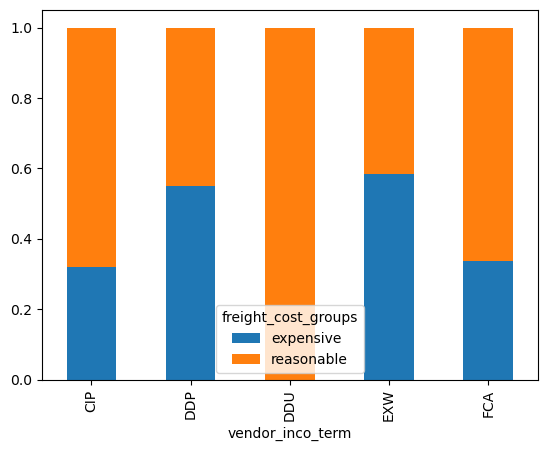

In [26]:
#Create a proportional stacked bar plot with bars filled based on freight_cost_group across the levels of vendor_inco_term.
wide_props.plot(kind="bar", stacked=True)
plt.show()

In [27]:
# Determine if freight_cost_group and vendor_inco_term are independent(Perform a chi-square test of independence on freight_cost_group and vendor_inco_term in the late_shipments dataset.)
expected, observed, stats = pingouin.chi2_independence(data=late_shipments,x="freight_cost_groups", y= "vendor_inco_term")

# Print results
print(stats[stats['test'] == 'pearson']) 

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


C:\Users\USER\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\USER\anaconda3\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7663: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7663: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7660: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.

Independence insight! The test to compare proportions of successes in a categorical variable across groups of another categorical variable is called a chi-square test of independence.

# Your recent learnings
When you left 22 hours ago, you worked on Proportion Tests, chapter 3 of the course Hypothesis Testing in Python. Here is what you covered in your last lesson:

You learned about the application of chi-square tests, specifically focusing on the chi-square test of independence and how it extends proportion tests to more than two groups. This test is crucial for analyzing if two categorical variables are independent of each other by comparing the observed counts against the expected counts under the assumption of independence.

Chi-square Test of Independence: You discovered that this test is used when you want to assess whether there's an association between two categorical variables. For example, testing if the proportion of hobbyists varies by age category using data from Stack Overflow.

Pingouin Package: You learned how to perform a chi-square test of independence using the pingouin package in Python. The syntax involves specifying the dataset, the two variables of interest, and whether to apply Yates' continuity correction. For instance:

import pingouin as pg
result = pg.chi2_independence(data=stack_overflow, x='hobbyist', y='age_cat', correction=False)
Interpreting Results: You learned to focus on the p-value and chi-square statistic from the test's output to determine if the variables are independent. A small p-value suggests evidence against independence, indicating an association between the variables.

Chi-square Distribution: The lesson covered the chi-square distribution's properties, emphasizing its right-tailed nature due to the test statistic being based on squared numbers.

Practical Application: Through exercises, you applied chi-square tests to real-world scenarios, such as examining the independence of job satisfaction across different age categories and assessing if incoterms affect freight costs.

This lesson equipped you with the knowledge to test hypotheses about the independence of categorical variables, enhancing your statistical analysis skills.

The goal of the next lesson is to teach how to apply chi-square goodness of fit tests to assess if the distribution of a categorical variable matches a hypothesized distribution, using examples from real datasets and visualization techniques for analysis.

# Chi2 goodness of fit test

# Visualizing goodness of fit
The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

CIP: 0.05

DDP: 0.1

EXW: 0.75

FCA: 0.1

These frequencies are stored in the hypothesized DataFrame.

The incoterm_counts DataFrame stores the .value_counts() of the vendor_inco_term column.

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases.

In [28]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Print n_total
print(n_total)

1000


In [29]:
# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized)

NameError: name 'hypothesized' is not defined

In [ ]:
# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts["vendor_inco_term"], incoterm_counts['n'], color="red", label="Observed")
plt.legend()
plt.show()

In [ ]:
# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], color="blue", alpha= 0.5, label="Hypothesized")
plt.legend()
plt.show()

Two of the bars in the sample are very close to the hypothesized values: one is a little high and one is a little low. Head on over to the next exercise to test if these differences are statistically significant.

# Performing a goodness of fit test
The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

H0: The sample matches with the hypothesized distribution.

Ha: The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of 0.1.

late_shipments, incoterm_counts, and hypothesized from the last exercise are available. chisquare from scipy.stats has been loaded.

In [30]:
from scipy.stats import chisquare

In [31]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts["n"], f_exp=hypothesized["n"])


# Print gof_test results
print(gof_test)

NameError: name 'incoterm_counts' is not defined

In [ ]:
# pvalue=0.5004909543758689

# p_value < 0.1

# Fail to reject the null hypothesis and conclude that n follows the distribution specified by hypothesized.

# Your recent learnings
When you left 19 hours ago, you worked on Non-Parametric Tests, chapter 4 of the course Hypothesis Testing in Python. Here is what you covered in your last lesson:

You learned about the critical assumptions underlying hypothesis testing and how to verify if your data meets these prerequisites. Understanding these assumptions is essential for conducting valid hypothesis tests. Here are the key points you covered:

Random Sampling: Every hypothesis test assumes that the sample is randomly selected from the population. This ensures that the sample is representative of the population. Remember, there's no statistical test to verify randomness; it's about the data collection process.

Independence of Observations: It's assumed that each observation in the sample does not influence another. This is crucial except in specific cases like paired t-tests, where dependencies are accounted for differently.

Sample Size and the Central Limit Theorem: For the sample distribution to approximate a normal distribution, a "big enough" sample size is necessary. This size varies by test but often includes at least 30 observations for t-tests and ANOVA, and at least 10 successes and failures for proportion tests. Smaller samples might not meet the normal distribution assumption, leading to inaccurate test results.
You also explored how to test if a sample size is adequate using Python, specifically with the pandas library. For example, to check if all elements in a DataFrame df are less than 5, you would use:

(df < 5).all()

This lesson emphasized the importance of meeting these assumptions before proceeding with hypothesis testing to ensure the reliability of your conclusions.

The goal of the next lesson is to learn how to select the appropriate statistical test based on the characteristics of your data and the assumptions each test requires.

# All hypothesis tests assume that the data are collected at random from the population, that each row is independent of the others, and that the sample size is "big enough".

# Testing sample size
In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the late_shipments dataset.

Note that the .all() method from pandas can be used to check if all elements are true. For example, given a DataFrame df with numeric entries, you check to see if all its elements are less than 5, using (df < 5).all().

late_shipments is available, and pandas is loaded as pd.

In [32]:
# Get the count of each value in the freight_cost_group column of late_shipments.
# Insert a suitable number to inspect whether the counts are "big enough" for a two sample t-test.

# Count the freight_cost_group values
counts = late_shipments["freight_cost_groups"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

freight_cost_groups
expensive     531
reasonable    455
Name: count, dtype: int64
True


In [33]:
# Get the count of each value in the late column of late_shipments.
# Insert a suitable number to inspect whether the counts are "big enough" for a one sample proportion test.

# Count the late values
counts = late_shipments["late"].value_counts()
# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

late
No     939
Yes     61
Name: count, dtype: int64
True


In [34]:
# Get the count of each value in the freight_cost_group column of late_shipments grouped by vendor_inco_term.
# Insert a suitable number to inspect whether the counts are "big enough" for a chi-square independence test.

# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby("vendor_inco_term")["freight_cost_groups"]. value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: count, dtype: int64
False


In [35]:
# Get the count of each value in the shipment_mode column of late_shipments.
# Insert a suitable number to inspect whether the counts are "big enough" for an ANOVA test.

# Count the shipment_mode values
counts = late_shipments["shipment_mode"]. value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

shipment_mode
Air            906
Ocean           88
Air Charter      6
Name: count, dtype: int64
False


#  While randomness and independence of observations can't easily be tested programmatically, you can test that your sample sizes are big enough to make a hypothesis test appropriate. Based on the last result, we should be a little cautious of the ANOVA test results given the small sample size for Air Charter.

# Non Parametric test
# the paired t-test is a parametric equivalent to the Wilcoxon signed-rank test
The Wilcoxon signed-rank test works well when the assumptions of a paired t-test aren't met.

# Wilcoxon-Mann-Whitney
Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.

In [52]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[["weight_kilograms", "late"]]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns="late", 
                                           values="weight_kilograms")

# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(weight_vs_late_wide['No'], weight_vs_late_wide['Yes'])

# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014 -0.331902  0.334049


The small p-value here leads us to suspect that a difference does exist in the weight of the shipment and whether or not it was late. The Wilcoxon-Mann-Whitney test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test.

# Kruskal-Wallis
Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.

In [54]:
# Run a Kruskal-Wallis test on weight_kilograms between the different shipment modes in late_shipments.

# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, dv="weight_kilograms", between= "shipment_mode")

# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28


The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. Th Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
sample = pd.read_feather("dem_votes_potus_12_16.feather")
print(sample.head())

     state    county  dem_percent_12  dem_percent_16
0  Alabama   Bullock       76.305900       74.946921
1  Alabama   Chilton       19.453671       15.847352
2  Alabama      Clay       26.673672       18.674517
3  Alabama   Cullman       14.661752       10.028252
4  Alabama  Escambia       36.915731       31.020546


# Visualizing the difference
Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.

In [39]:
# Calculate the differences from 2012 to 2016
sample['diff'] = sample['dem_percent_12'] - sample["dem_percent_16"]

# Print sample_dem_data
print(sample)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


In [40]:
# Find the mean of the diff column
xbar_diff = sample['diff'].mean()

# Print xbar_diff
print(xbar_diff)

6.829312660106834


In [41]:
# Find the standard deviation of the diff column
s_diff = sample['diff'].std()

# Print s_diff
print(s_diff)

5.040139140132316


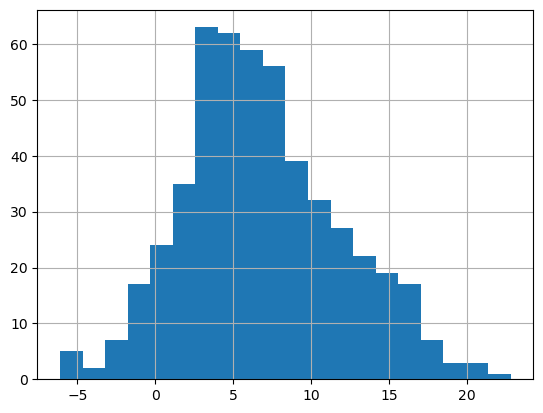

In [42]:
# Plot a histogram of diff with 20 bins
sample['diff'].hist(bins=20)
plt.show()

# Notice that the majority of the histogram lies to the right of zero.

# Using ttest()
Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

Ho: The proportion of democratic votes in 2012 and 2016 were the same. 
Ha: The proportion of democratic votes in 2012 and 2016 were different.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.


Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".



In [43]:
import pingouin

In [44]:
alpha = 0.01

In [45]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample['diff'], y=0)
                              
# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [46]:
print(test_results.iloc[0, 3])

3.6006339790844295e-115


In [47]:
float_value = float(test_results.iloc[0, 3])

if float_value <= alpha:
    message = "Reject the null hypothesis."
else:
    message = "Fail to reject the null hypothesis."

print(message)


Reject the null hypothesis.


In [48]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
pingouin.ttest(x=sample['dem_percent_12'], y=sample['dem_percent_16'], paired= True, alternative= 'two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


In [49]:
Compare the paired t-test to an (inappropriate) unpaired test on the same data. How does the p-value change?

# unpaired 
pingouin.ttest(x=sample['dem_percent_12'], 
               y=sample['dem_percent_16'], 
               alternative="two-sided")
# The p-value from the unpaired test is greater than than the p-value from the paired test.
# When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

Object `change` not found.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.181565,998,two-sided,1.345737e-12,"[4.96, 8.7]",0.454202,4.308e+09,1.0


# Your recent learnings
When you left 1 day ago, you worked on Two-Sample and ANOVA Tests, chapter 2 of the course Hypothesis Testing in Python. Here is what you covered in your last lesson:

You learned about the process of testing for differences in means between two groups using t-tests, focusing on calculating p-values from t-statistics. Key points covered include:

The concept of t-distribution and how it differs from the normal distribution, particularly in terms of the degrees of freedom (df). You saw that t-distributions have fatter tails for smaller df, but resemble the normal distribution as df increases.
Degrees of freedom were explained as the number of independent values in a data sample minus the number of sample statistics known. For example, in a dataset with 5 observations and a known mean, the df would be 4.
The significance of the t-test in hypothesis testing, especially when dealing with small sample sizes or when the population standard deviation is unknown. This makes the t-test more suitable than the z-test in many real-world scenarios.
Calculating p-values using the t-distribution's cumulative distribution function (CDF) instead of the normal distribution's CDF. This involves using the t.cdf method from scipy.stats, with the test statistic and df as arguments.
For instance, to calculate a p-value for a right-tailed test with a test statistic t_stat and degrees of freedom df, you would use:

p_value = 1 - t.cdf(t_stat, df)

This calculation helps determine whether to reject the null hypothesis, with a lower p-value indicating stronger evidence against the null hypothesis in favor of the alternative.

The goal of the next lesson is to learn how to use the paired t-test for comparing the means of two related groups using Python's pingouin package.

# Wilcoxon signed-rank test
You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

sample_dem_data is available, and has columns dem_percent_12 and dem_percent_16 in addition to state and county names. The following packages have also been loaded: pingouin and pandas as pd.

In [50]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
# Conduct a paired t-test on the percentage columns using an appropriate alternative hypothesis.
paired_test_results = pingouin.ttest(x=sample_dem_data["dem_percent_12"], y=sample_dem_data["dem_percent_16"], paired= True, alternative= "two-sided") 

# Print paired t-test results
print(paired_test_results)

NameError: name 'sample_dem_data' is not defined

In [51]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data["dem_percent_12"], y=sample_dem_data["dem_percent_16"], alternative= "two-sided")


# Print Wilcoxon test results
print(wilcoxon_test_results)

NameError: name 'sample_dem_data' is not defined

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stack_over_flow = pd.read_feather("stack_overflow.feather")
print(stack_over_flow.head())

   respondent                                        main_branch hobbyist  \
0        36.0  I am not primarily a developer, but I write co...      Yes   
1        47.0                     I am a developer by profession      Yes   
2        69.0                     I am a developer by profession      Yes   
3       125.0  I am not primarily a developer, but I write co...      Yes   
4       147.0  I am not primarily a developer, but I write co...       No   

    age  age_1st_code age_first_code_cut comp_freq  comp_total  \
0  34.0          30.0              adult    Yearly     60000.0   
1  53.0          10.0              child    Yearly     58000.0   
2  25.0          12.0              child    Yearly    550000.0   
3  41.0          30.0              adult   Monthly    200000.0   
4  28.0          15.0              adult    Yearly     50000.0   

   converted_comp         country  ...          survey_length trans  \
0         77556.0  United Kingdom  ...  Appropriate in length    No  

In [3]:
print(stack_over_flow.columns.unique())

Index(['respondent', 'main_branch', 'hobbyist', 'age', 'age_1st_code',
       'age_first_code_cut', 'comp_freq', 'comp_total', 'converted_comp',
       'country', 'currency_desc', 'currency_symbol',
       'database_desire_next_year', 'database_worked_with', 'dev_type',
       'ed_level', 'employment', 'ethnicity', 'gender', 'job_factors',
       'job_sat', 'job_seek', 'language_desire_next_year',
       'language_worked_with', 'misc_tech_desire_next_year',
       'misc_tech_worked_with', 'new_collab_tools_desire_next_year',
       'new_collab_tools_worked_with', 'new_dev_ops', 'new_dev_ops_impt',
       'new_ed_impt', 'new_job_hunt', 'new_job_hunt_research', 'new_learn',
       'new_off_topic', 'new_onboard_good', 'new_other_comms', 'new_overtime',
       'new_purchase_research', 'purple_link', 'newso_sites', 'new_stuck',
       'op_sys', 'org_size', 'platform_desire_next_year',
       'platform_worked_with', 'purchase_what', 'sexuality', 'so_account',
       'so_comm', 'so_part_freq'

# A Hypothesis
the mean anual salary of data scientists is $110000

In [4]:
# the point estimate(sample statistics)
mean_comp_samp= stack_over_flow["converted_comp"].mean()
print(mean_comp_samp)

119574.71738168952


In [6]:
# step 1 -RESAMPLE (bootstrap distribution of sample mean)

stack_over_flow.sample(frac=1, replace=True)["converted_comp"]

# step 2 calculate the sample mean for the bootstrap distribution
np.mean(stack_over_flow.sample(frac=1, replace=True)["converted_comp"])

122024.95709862892

In [8]:
# step 3- repeat step 1 and 2 5000 times

boot_dist=[]
for _ in range(5000):
    boot_dist.append(np.mean(stack_over_flow.sample(frac=1, replace=True)["converted_comp"]
    )
)

print(boot_dist)

[126566.83458646617, 122823.54754533392, 112487.63246351172, 125431.28881026094, 120076.12781954887, 114991.90977443609, 123022.79345422379, 124439.08182220257, 129387.87306501548, 118794.15391419726, 120290.83679787704, 124118.5072976559, 119137.15612560813, 117386.13312693499, 121805.77443609023, 115389.92525431226, 133386.91685095092, 114131.4834144184, 119006.22777532066, 115729.80141530297, 115247.26625386997, 116828.67049977886, 123723.09730207872, 121399.84829721363, 117831.42680229987, 125295.98938522777, 117292.78505086245, 129435.90800530738, 103079.81070322866, 122496.87306501548, 125469.69394073419, 111462.74745687749, 113003.34896063688, 122895.2658115878, 129106.89650597081, 123103.98230871296, 114262.93631136665, 118370.70720919946, 117081.91773551526, 112715.76028306059, 122477.10835913313, 119549.10437859355, 125499.45466607696, 115540.28261831048, 117956.00442282176, 122532.10437859355, 118362.4281291464, 119115.92260061919, 107811.05042016807, 122505.42237947811, 122

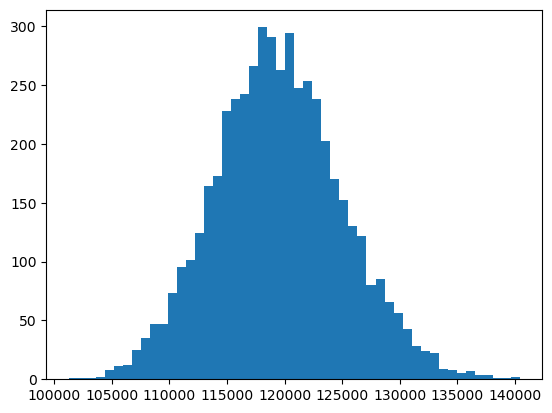

In [9]:
# visualising the bootstrap distribution
plt.hist(boot_dist, bins=50)
plt.show()

In [10]:
# standard Error
std_error = np.std(boot_dist, ddof=1)
std_error

5566.813358516104

# z_score

In [11]:
# since variables have arbitrary units and ranges, before we test our hypothesis we need to standardise the values
# z = (sample_stat-hypoth_param_value)/std_error
mean_comp_samp
mean_comp_hyp= 110000
std_error

print(mean_comp_samp,
mean_comp_hyp,
std_error)

119574.71738168952 110000 5566.813358516104


In [12]:
z= (mean_comp_samp-mean_comp_hyp)/std_error
print(z)

1.719963786291152


# Testing the Hypothesis (hypothesis use case)

Uses of A/B testing = It provides a way to check outcomes of competing scenarios and decide which way to proceed.